In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/multi_modal_genre_classifier/

/content/drive/MyDrive/multi_modal_genre_classifier


### Importing our dataset and performing basic preprocessing to retrieve the features

In [ ]:
import pandas as pd
df_metadata = pd.read_parquet('4mula_small.parquet')
df_metadata.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram
0,3ade68b6gc207fda3,I've Got To See You Again,en,Line on your face don't bother me\nDown in my ...,3ade68b6gfd79eda3,Norah Jones,353,Jazz,"['Jazz', 'Blues', 'Soul Music', 'Country', 'Ro...","[{'id': '3ade68b6g9a3beda3', 'name': 'Joss Sto...","[{'id': '3ade68b7gdddfcea3', 'name': 'Ten Phan...","['piano','drums','slow']","[[136.96524, 135.869965, 118.730804, 133.62802..."
1,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
2,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
3,3ade68b8gcd12d0b3,Good Form,en,"Eardrummers\nUh, uh, huh, uh, huh\nUh, yo, hol...",3ade68b7gc2b61ea3,Nicki Minaj,421,Rap,"['Rap', 'Pop', 'Hip Hop', 'R&B', 'Dance', 'Ele...","[{'id': '3ade68b5g8d18eda3', 'name': 'Lil Wayn...",[],"['techno','electronic','beat']","[[2.005826, 0.721350968, 0.2188458, 0.23778049..."
4,3ade68b7g955b3ea3,Out Of Time,en,You don't know what's going on\nYou've been aw...,3ade68b6g28c9eda3,Rolling Stones,118,Classic Rock,"['Classic Rock', 'Rock', 'Blues', 'R&B', 'Hard...","[{'id': '3ade68b6g7d5aeda3', 'name': 'Mick Jag...","[{'id': '3ade68b7g9ae20ea3', 'name': 'Run Of T...","['guitar','vocal','drums']","[[0.200993568, 0.232473925, 0.227112547, 0.139..."


#### Basic EDA to find class distribution and retrieving data based on top music languagea and top 10 genres



In [ ]:
df_metadata.value_counts('music_lang')

music_lang
en       4723
pt-br    4655
es        246
pt         37
dtype: int64

In [ ]:
df = df_metadata.loc[df_metadata['music_lang'].isin(['en','pt-br'])]
df.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram
0,3ade68b6gc207fda3,I've Got To See You Again,en,Line on your face don't bother me\nDown in my ...,3ade68b6gfd79eda3,Norah Jones,353,Jazz,"['Jazz', 'Blues', 'Soul Music', 'Country', 'Ro...","[{'id': '3ade68b6g9a3beda3', 'name': 'Joss Sto...","[{'id': '3ade68b7gdddfcea3', 'name': 'Ten Phan...","['piano','drums','slow']","[[136.96524, 135.869965, 118.730804, 133.62802..."
1,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
2,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
3,3ade68b8gcd12d0b3,Good Form,en,"Eardrummers\nUh, uh, huh, uh, huh\nUh, yo, hol...",3ade68b7gc2b61ea3,Nicki Minaj,421,Rap,"['Rap', 'Pop', 'Hip Hop', 'R&B', 'Dance', 'Ele...","[{'id': '3ade68b5g8d18eda3', 'name': 'Lil Wayn...",[],"['techno','electronic','beat']","[[2.005826, 0.721350968, 0.2188458, 0.23778049..."
4,3ade68b7g955b3ea3,Out Of Time,en,You don't know what's going on\nYou've been aw...,3ade68b6g28c9eda3,Rolling Stones,118,Classic Rock,"['Classic Rock', 'Rock', 'Blues', 'R&B', 'Hard...","[{'id': '3ade68b6g7d5aeda3', 'name': 'Mick Jag...","[{'id': '3ade68b7g9ae20ea3', 'name': 'Run Of T...","['guitar','vocal','drums']","[[0.200993568, 0.232473925, 0.227112547, 0.139..."


In [ ]:
df.value_counts('main_genre')

main_genre
Gospel/Religious    1165
Pop                  912
Romantic             905
Rock                 608
Sertanejo            576
Pop/Rock             490
MPB                  471
Alternative Rock     405
Hip Hop              327
Dance                312
Rap                  271
Indie                251
Samba                236
Soundtrack           227
R&B                  169
Kids                 150
Pagode               130
Hard Rock            124
Soul Music           123
Soft Rock            119
Electronic           116
Forró                114
Reggae               109
Folk                 101
Unknown               85
Surf Music            75
Black Music           73
Jazz                  73
Axé                   68
House                 47
Samba Enredo          44
Gothic                42
Funk Carioca          42
Punk Rock             40
Bossa Nova            40
Grunge                39
Piano Rock            36
Heavy Metal           36
New Wave              36
Progressive   

In [ ]:
df = df.loc[df['main_genre'].isin(['Sertanejo','Rock','Pop/Rock','MPB','Alternative Rock'])]
df.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram
0,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
1,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
8,3ade68b7gf0375ea3,Na Sua Estante,pt-br,Te vejo errando e isso não é pecado\nExceto qu...,3ade68b6gd91aeda3,Pitty,223,Alternative Rock,"['Rock Alternativo', 'Rock', 'Pop/Rock', 'Punk...","[{'id': '3ade68b6g309aeda3', 'name': 'Inkoma'}...","[{'id': '3ade68b5g7158eda3', 'name': 'Primeiro...","['rock','guitar','male']","[[24.5147076, 19.3911915, 12.9581242, 7.063698..."
12,3ade68b8ge96310b3,I Lived,en,Hope when you take that jump\nYou don't feel t...,3ade68b6g3ae7fda3,OneRepublic,241,Alternative Rock,"['Rock Alternativo', 'Pop/Rock', 'Rock', 'Pop'...","[{'id': '3ade68b5gf408eda3', 'name': 'Timbalan...",[],"['male','man','male vocal']","[[8.93155811e-05, 0.000112133188, 8.39726417e-..."
16,3ade68b6gf35eeda3,De do Do do de da Da Da,en,Don't think me unkind\nWords are hard to find\...,3ade68b5gb877eda3,The Police,230,Rock,"['Rock', 'New Wave', 'Punk Rock', 'Pop/Rock', ...","[{'id': '3ade68b7gf4242ea3', 'name': 'Andy Sum...","[{'id': '3ade68b5g5887eda3', 'name': 'You Shou...","['drums','guitar','rock']","[[23.2699013, 18.8213215, 15.2065153, 3.923572..."


In [ ]:
df.value_counts('main_genre')

main_genre
Gospel/Religious    1165
Pop                  912
Romantic             905
Rock                 608
Sertanejo            576
Pop/Rock             490
MPB                  471
Alternative Rock     405
Hip Hop              327
Indie                251
dtype: int64

In [ ]:
df = df.reset_index(drop=True)

### Installing and downloading the BERT base model to generate lyric embeddings

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=42083223aeb59682d18863a3ce902b6feb8c9e1c429f129c3d52961936dc7576
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-multilingual-uncased')

.gitattributes:   0%|          | 0.00/445 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/672M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

In [ ]:
lyric_corpus = tsne_df['music_lyrics']
lyric_corpus

0     Burn like a slave\nChurn like a cog\nWe are ca...
1     Uma notícia está chegando lá do Maranhão\nNão ...
2     É alta madrugada\nE eu contando estrelas\nEla ...
3     O que foi?\nTa batendo na minha porta à essas ...
4     He's going back to Georgia\nBecause he knows t...
5     All the right friends in all the right places\...
6     \nE7+          F#/E\nA felicidade corre sem pa...
7     Eu te dei o ouro do sol, a prata da lua\nTe de...
8     Hoje eu vou sair para encontrar o amor\nEspero...
9     Se você já me esqueceu\nPor favor então vai em...
10    Ela chegou me ajudando com a churrasqueira\nNo...
11    Muito prazer em revê-la você está bonita\nMuit...
12    I come from down in the valley\nWhere mister, ...
13    Deveres e Direitos \nCrianças: iguais são seus...
14    This is New York, yo\n\nNight falls on the cit...
15    Era um cidadão comum como esses que se vê na r...
16    Falling too fast to prepare for this\nTripping...
17    Ten decisions shape your life, \nYou'll be

#### Basic data processing to remove new line character

In [ ]:
lyric_corpus = [x.replace('\\n', ' ') for x in lyric_corpus]

In [ ]:
lyric_corpus[0]

'Burn like a slave Churn like a cog We are caged in simulations Algorithms evolve Push us aside and render us obsolete  This means war With your creator This means war With your creator  Reload, crash out  This means war With your creator This means war With your creator'

In [ ]:
lyric_embeddings = model.encode(lyric_corpus)

In [ ]:
import numpy as np
lyric_embeddings_list = []
for i in range(len(lyric_embeddings)):
  lyric_embeddings_list.append(np.ravel(lyric_embeddings[i].tolist()))

#### Sample t-SNE plot for a small sample of the dataset

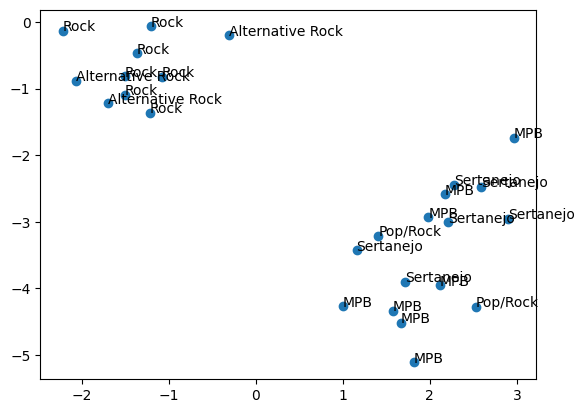

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0, perplexity=14)
tsne_data = tsne_model.fit_transform(np.array(lyric_embeddings_list))

# Plot the t-SNE visualization
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
for i, txt in enumerate(genres):
    plt.annotate(txt, (tsne_data[i, 0], tsne_data[i, 1]))
plt.show()

In [ ]:
train_df = df[['main_genre']]
train_df.head()

,main_genre
0,Alternative Rock
1,MPB
2,Hip Hop
3,Gospel/Religious
4,Gospel/Religious


In [ ]:
train_df = df['main_genre']
train_df.head()

0    Alternative Rock
1                 MPB
2             Hip Hop
3    Gospel/Religious
4    Gospel/Religious
Name: main_genre, dtype: object

In [ ]:
train_df['lyric_embeddings'] = lyric_embeddings_list
train_df.head()

<ipython-input-29-4048b456aac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['lyric_embeddings'] = lyric_embeddings_list


,main_genre,lyric_embeddings
0,Alternative Rock,"[-0.24547763168811798, -0.2279006689786911, 0...."
1,MPB,"[-0.31952574849128723, -0.07934586703777313, 0..."
2,Hip Hop,"[-0.26020875573158264, -0.0014233174733817577,..."
3,Gospel/Religious,"[-0.1767004132270813, -0.14257089793682098, 0...."
4,Gospel/Religious,"[-0.3851100504398346, -0.23907773196697235, 0...."


In [ ]:
train_df = pd.get_dummies(train_df, columns=['main_genre'])
train_df.head()

,lyric_embeddings,main_genre_Alternative Rock,main_genre_Gospel/Religious,main_genre_Hip Hop,main_genre_Indie,main_genre_MPB,main_genre_Pop,main_genre_Pop/Rock,main_genre_Rock,main_genre_Romantic,main_genre_Sertanejo
0,"[-0.24547763168811798, -0.2279006689786911, 0....",1,0,0,0,0,0,0,0,0,0
1,"[-0.31952574849128723, -0.07934586703777313, 0...",0,0,0,0,1,0,0,0,0,0
2,"[-0.26020875573158264, -0.0014233174733817577,...",0,0,1,0,0,0,0,0,0,0
3,"[-0.1767004132270813, -0.14257089793682098, 0....",0,1,0,0,0,0,0,0,0,0
4,"[-0.3851100504398346, -0.23907773196697235, 0....",0,1,0,0,0,0,0,0,0,0


In [ ]:
train_df.columns

Index(['lyric_embeddings', 'main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo'],
      dtype='object')

### Creating a custom data loader which returns lyrics and the corresponding labels

In [ ]:
class CustomImageTextDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seed = 42
        torch.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        self.data = self.data.reset_index(drop=True)
        lyrics = self.data['lyric_embeddings'][idx]
        lyrics = torch.tensor(lyrics, dtype=torch.float32)
        labels = torch.tensor(self.data[['main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo']].iloc[idx],dtype=torch.float32)
        return lyrics, labels

train_data = train_df.sample(frac=0.80, random_state=42)
test_data = train_df.sample(frac=0.20, random_state=42)


traindata = CustomImageTextDataset(
    csv_file=train_data,
)


testdata = CustomImageTextDataset(
    csv_file=test_data,
)

# Create a data loader with 32 data points as the batch size
batch_size = 32
train_loader = DataLoader(traindata, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testdata, batch_size=batch_size, shuffle=True)

### Designing a deep learning model to perform classification

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import numpy as np
from numpy import argmax
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import torch.nn.functional as F


class LyricClassifier(nn.Module):

    def __init__(self, num_classes):
        super(LyricClassifier, self).__init__()
        self.num_classes = num_classes
        self.linear1 = nn.Linear(768, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256,128)
        self.linear4 = nn.Linear(128,num_classes)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        out = torch.relu(self.linear4(x))
        #out = F.softmax(x, dim=1)

        return out

### Performing training for 50 epochs with lr = 0.0001 and Adam optimizer

In [ ]:
model = LyricClassifier(num_classes = 10)
model = model.float()

# Transfer Model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()

batch_size = 32
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

for epoch in range(epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:

            # Transfer Data to GPU if available
            if torch.cuda.is_available():
                inputs, targets = inputs.cuda(), targets.cuda()

            optimizer.zero_grad()
            #print(inputs.size())
            outputs = model(inputs)
            # calculate loss
            loss = criterion(outputs, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

            train_loss += loss.item()

    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)}')

    torch.save(model.state_dict(), '/content/drive/MyDrive/multi_modal_genre_classifier/saved_model_lyric_only_10_genres_50ep.pth')

Epoch 1 		 Training Loss: 2.290778202169082
Epoch 2 		 Training Loss: 2.271463482987647
Epoch 3 		 Training Loss: 2.248158163494534
Epoch 4 		 Training Loss: 2.233604942271912
Epoch 5 		 Training Loss: 2.2222598596336014
Epoch 6 		 Training Loss: 2.082174930697173
Epoch 7 		 Training Loss: 1.832345930579441
Epoch 8 		 Training Loss: 1.798505642055686
Epoch 9 		 Training Loss: 1.782095553049075
Epoch 10 		 Training Loss: 1.7697315784840801
Epoch 11 		 Training Loss: 1.758365096609577
Epoch 12 		 Training Loss: 1.7483776675330267
Epoch 13 		 Training Loss: 1.7381691932678223
Epoch 14 		 Training Loss: 1.7285693657943626
Epoch 15 		 Training Loss: 1.719740488949944
Epoch 16 		 Training Loss: 1.710180994731928
Epoch 17 		 Training Loss: 1.7016176842396555
Epoch 18 		 Training Loss: 1.6929783922394896
Epoch 19 		 Training Loss: 1.6844873950372334
Epoch 20 		 Training Loss: 1.6757206293492535
Epoch 21 		 Training Loss: 1.6670460132212421
Epoch 22 		 Training Loss: 1.65932502933577
Epoch 23 	

### Testing and evaluating the model using the saved weights

In [ ]:
genres = ['main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo']

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model = LyricClassifier(num_classes = 10)
best_model.load_state_dict(torch.load('/content/drive/MyDrive/multi_modal_genre_classifier/saved_model_lyric_only_10_genres_50ep.pth'))
best_model.to(device)

best_model.eval()
y_pred = []
y_true = []
i = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        i += 1
        try:
          outputs = best_model(inputs)
          y_pred.extend(outputs.cpu().numpy())
          y_true.extend(labels.cpu().numpy())
        except IndexError:
          print(inputs)
          print(i)
          print(inputs.shape)

In [ ]:
y_pred[0]

array([0.        , 0.        , 0.        , 0.        , 0.01779187,
       0.        , 3.0295098 , 2.147402  , 0.        , 0.        ],
      dtype=float32)

In [ ]:
y_true[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred_edited = []
for i in y_pred:
  genre = np.argmax(i)
  y_pred_edited.append(genres[genre])

y_true_edited = []
for i in y_true:
  genre = np.argmax(i)
  y_true_edited.append(genres[genre])

In [ ]:
y_pred_edited[120]

'main_genre_MPB'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

accuracy = accuracy_score(y_true_edited, y_pred_edited)
precision = precision_score(y_true_edited, y_pred_edited, average='macro')
recall = recall_score(y_true_edited, y_pred_edited, average='macro')
f1 = f1_score(y_true_edited, y_pred_edited, average='macro')
conf_matrix = confusion_matrix(y_true_edited, y_pred_edited)

#Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(conf_matrix)

Accuracy: 0.5008183306055647
Precision: 0.34282375883878974
Recall: 0.41259137496210146
F1 Score: 0.35828459603004514
[[ 27   4   0   0   1  39  14   0   0   0]
 [  0 231   0   0   2   1   1   0   0   0]
 [ 28   1   0   0   2  22   3   0   0   0]
 [  9   6   0   0   0  39   5   0   0   0]
 [  7   7   0   0  71   0   3   0   0   0]
 [  7   3   0   0   4 155   1   1   0   0]
 [  7  10   0   0   4  38  49   0   0   0]
 [  9   3   0   0   2  19   8  79   0   0]
 [ 88  18   0   0  10  45  18   0   0   0]
 [ 85  17   0   0   8   7   4   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_true_edited,y_pred_edited))

                             precision    recall  f1-score   support

main_genre_Alternative Rock       0.10      0.32      0.15        85
main_genre_Gospel/Religious       0.77      0.98      0.86       235
         main_genre_Hip Hop       0.00      0.00      0.00        56
           main_genre_Indie       0.00      0.00      0.00        59
             main_genre_MPB       0.68      0.81      0.74        88
             main_genre_Pop       0.42      0.91      0.58       171
        main_genre_Pop/Rock       0.46      0.45      0.46       108
            main_genre_Rock       0.99      0.66      0.79       120
        main_genre_Romantic       0.00      0.00      0.00       179
       main_genre_Sertanejo       0.00      0.00      0.00       121

                   accuracy                           0.50      1222
                  macro avg       0.34      0.41      0.36      1222
               weighted avg       0.40      0.50      0.43      1222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
